In [4]:
import math
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
def f(x):
    return 3*x**2 - 4*x +5

In [6]:
class Value:
    def __init__(self,data, _children=(),_op=''):
        self.data =data
        self._prev = set(_children)
        self._op=_op
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,data2):
        out = Value(self.data+ data2.data, (self,data2),'+')
        return out
    def __mul__(self,data2):
        out = Value(self.data*data2.data, (self, data2),'*')
        return out

a= Value(2.0)
b= Value(-3.0)
c= Value(10.0)

x=a*b
y=x+c

d=a * b +c
d

Value(data=4.0)

In [7]:
x,y

(Value(data=-6.0), Value(data=4.0))

In [8]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [9]:
d._op

'+'

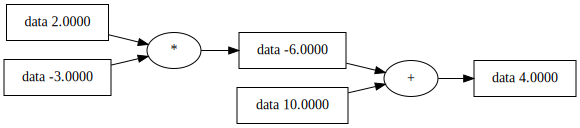

In [12]:
#for visulaization:
from graphviz import Digraph

def trace(root):
# builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape='record' )
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect nl to the op node of n2
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot

draw_dot(d)